In [1]:
"""
Created on Thu Apr 16 17:25:36 2020

@author: maddalena
"""
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import matplotlib.gridspec as gridspec

In [2]:
# The SIR model differential equations.
def deriv(y, t, N, beta,gamma):
    S,I,R = y

    dSdt = -(beta*I/N)*S 
    dIdt = (beta*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt

In [3]:
#Integration of the differential equations
    
def time_evo(N,beta,gamma,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N,beta,gamma))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,R)

In [4]:
#Show the result

fin_result=time_evo(1000,0.5,0.1)

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]

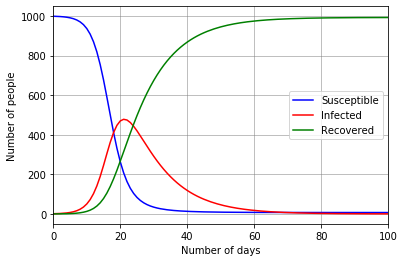

In [5]:
#SIR MODEL PLOT

plt.plot(t, s_vec, 'b', label='Susceptible')
plt.plot(t, i_vec, 'r', label='Infected')
plt.plot(t, r_vec, 'g', label='Recovered')
#plt.plot(t, m_vec, 'k', label='Deaths')
#plt.plot(t, i_vec+r_vec, color='orange',linestyle='--', label='Infected + Recovered')
plt.legend(loc=5)
#plt.yscale('log')
#plt.ylim(0.5,3000)
plt.xlim(0,100)
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
#plt.savefig('plotsir05.png',dpi=300)
plt.show()

In [6]:
#IMPORT FILES WORLD
#i files sono: le righe sono le nazioni, le colonne i giorni del mese (DATE).

file_confirmed='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
file_deaths='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
file_recovered='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df_confirmed=pd.read_csv(file_confirmed)
df_deaths=pd.read_csv(file_deaths)
df_recovered=pd.read_csv(file_recovered)

In [7]:
#Data manipulation and representation (World)

deaths_world=df_deaths.iloc[:,-1].sum()
recovered_world=df_recovered.iloc[:,-1].sum()
total_world=df_confirmed.iloc[:,-1].sum()

max_death_rate=round(deaths_world/(deaths_world+recovered_world)*100,1)
min_death_rate=round(deaths_world/total_world*100,1)

print('Total contaminated:',total_world)
print('Total deaths:',deaths_world)
print('Total recovered:',recovered_world)

print('Based on the WHO data, the death rate is between',min_death_rate,'% and',max_death_rate,'% of the confirmed case')

Total contaminated: 2896744
Total deaths: 202844
Total recovered: 817838
Based on the WHO data, the death rate is between 7.0 % and 19.9 % of the confirmed case


In [8]:
def mortality_rate(f_asympt):
    recovered_tot=recovered_world+f_asympt*total_world
    return deaths_world/(deaths_world+recovered_tot)

print(mortality_rate(1)*100)
print(mortality_rate(2)*100)

f_asympt_grid=np.arange(0,2.5,0.1)

5.177991875277287
2.976796880617889


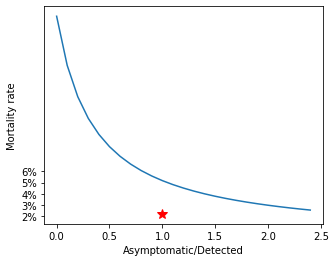

In [9]:
plt.figure(figsize=(5,4))
plt.plot(f_asympt_grid,mortality_rate(f_asympt_grid)*100)
plt.xlabel('Asymptomatic/Detected')
plt.ylabel('Mortality rate')
plt.yticks([1,2,3,4,5,6],['1%','2%','3%','4%','5%','6%'])
plt.plot(1,2.2,marker='*',color='red',markersize=11)
#plt.savefig('mortality_rate_plot.png',dpi=300)
plt.show()

In [10]:
def func_plot(df):
    y_world=[]
    n_cols=df.shape[1]
    #print(n_cols)
    for i in range(n_cols-4):
        y_world.append(df.iloc[:,i+4].sum())
    
    x_world2=df.columns[4:]
    x_world=pd.to_datetime(x_world2,infer_datetime_format=False)
    
    return (x_world,y_world)

peppe=func_plot(df_confirmed)

In [11]:
######## INPUT PARAMETERS ########
country='Germany'
t0=pd.to_datetime('2020-01-22')
#################################

mask_coun=df_confirmed['Country/Region']==country   # you can change the country here
mask_coun_rec=df_recovered['Country/Region']==country

df_confirmed_coun=df_confirmed.loc[mask_coun,:]
df_deaths_coun=df_deaths.loc[mask_coun,:]
df_recovered_coun=df_recovered.loc[mask_coun_rec,:]

#somma tutte le ultime colonne (cioè valori dell'ultimo giorno) 
#dei 3 files, deaths, recovered, confirmed, per avere il TOT mondiale 
deaths_world_coun=df_deaths_coun.iloc[:,-1].sum()
recovered_world_coun=df_recovered_coun.iloc[:,-1].sum()
total_world_coun=df_confirmed_coun.iloc[:,-1].sum()

max_death_rate_coun=round(deaths_world_coun/(deaths_world_coun+recovered_world_coun)*100,1)
min_death_rate_coun=round(deaths_world_coun/total_world_coun*100,1)

print('Total contaminated:',country,total_world_coun)
print('Total deaths',country,deaths_world_coun)
print('Total recovered ',country,recovered_world_coun)

print('Based on the WHO data, the death rate in',country,'is between',min_death_rate_coun,'% and',max_death_rate_coun,'% of the total confirmed case')

Total contaminated: Germany 156513
Total deaths Germany 5877
Total recovered  Germany 109800
Based on the WHO data, the death rate in Germany is between 3.8 % and 5.1 % of the total confirmed case


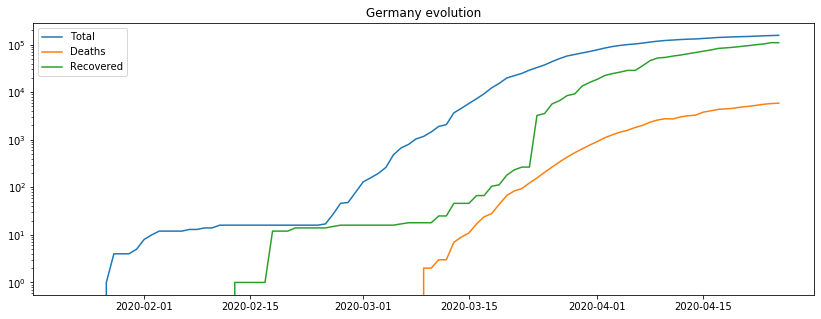

In [12]:
plt.figure(figsize=(14,5))
plt.plot(func_plot(df_confirmed_coun)[0],func_plot(df_confirmed_coun)[1],label='Total')
plt.plot(func_plot(df_deaths_coun)[0],func_plot(df_deaths_coun)[1],label='Deaths')
plt.plot(func_plot(df_recovered_coun)[0],func_plot(df_recovered_coun)[1],label='Recovered')
plt.legend()
plt.yscale('log')
plt.title(country+' evolution')
#plt.savefig('country_plot.png',dpi=300)
plt.show()

In [13]:
ytot=np.array(func_plot(df_confirmed_coun)[1])
ydeaths=np.array(func_plot(df_deaths_coun)[1])
yrec=np.array(func_plot(df_recovered_coun)[1])

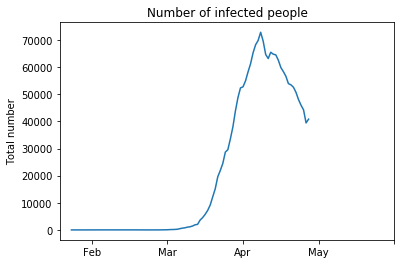

In [14]:
plt.plot(ytot-ydeaths-yrec)
#plt.yscale('log')
plt.xticks(np.arange(8,130,30),['Feb','Mar','Apr','May'])
plt.ylabel('Total number')
plt.title('Number of infected people')
#plt.savefig('activegermany.png',dpi=300)
plt.show()

In [19]:
#Generalization to other countries

def whichcountry(name):
        
    ######## INPUT PARAMETERS ########
    country=name
    t0=pd.to_datetime('2020-01-22')
    #################################

    mask_coun=df_confirmed['Country/Region']==country   # you can change the country here
    mask_coun_rec=df_recovered['Country/Region']==country

    df_confirmed_C=df_confirmed.loc[mask_coun,:]
    df_deaths_C=df_deaths.loc[mask_coun,:]
    df_recovered_C=df_recovered.loc[mask_coun_rec,:]

    ytot=np.array(func_plot(df_confirmed_C)[1])
    ydeaths=np.array(func_plot(df_deaths_C)[1])
    yrec=np.array(func_plot(df_recovered_C)[1])

    return ytot-ydeaths-yrec, ytot[-1], yrec[-1],ydeaths[-1]

In [20]:
print(whichcountry('Bosnia and Herzegovina')[1])#confirmed last day
print(whichcountry('Portugal')[2])#recovered last day

1486
1277


In [22]:
#definition of time
df_time=pd.to_datetime(np.arange(len(ytot)),unit='D',origin=pd.Timestamp('2020-01-22'))

# list of top countries , with the higher number of cases

df_nofcases=pd.DataFrame(np.array(df_confirmed.iloc[:,1]))
df_nofcases.columns=['Country']
df_nofcases['Confirmed']=df_confirmed.iloc[:,-1]

df_nofcases
#np.array(df_nofcases.sort_values(by='Confirmed',ascending=False).head(6)['Country'])

,Country,Confirmed
0,Afghanistan,1463
1,Albania,712
2,Algeria,3256
3,Andorra,738
4,Angola,25
...,...,...
259,France,1
260,South Sudan,5
261,Western Sahara,6
262,Sao Tome and Principe,4


In [23]:
countries_list=['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']

In [25]:
df_active=pd.DataFrame(whichcountry(countries_list[0])[0])
df_active.columns=[countries_list[0]]
df_active.index=df_time

for i in range(0,len(countries_list)):
    df_active[countries_list[i]]=whichcountry(countries_list[i])[0]

df_active.columns=['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']
print(df_active[-1:])

            Albania  Armenia  Austria  Azerbaijan  Belarus  Belgium  \
2020-04-25      282      846     2509         516     7950    27991   

            Bosnia and Herzegovina  Bulgaria  Cyprus  Croatia  ...  Romania  \
2020-04-25                     837       995     648      928  ...     7144   

            Serbia  Slovakia  Slovenia   Spain  Sweden  Switzerland  Turkey  \
2020-04-25    5635       970      1088  105149   14980         5995   79485   

            Ukraine  United Kingdom  
2020-04-25     7142          128414  

[1 rows x 47 columns]


In [28]:
print(df_active['Italy'])

2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2020-04-21    107709
2020-04-22    107699
2020-04-23    106848
2020-04-24    106527
2020-04-25    105847
Name: Italy, Length: 95, dtype: int64


In [29]:
df_active.to_csv('active_infected',index=True)

In [30]:
data = pd.read_csv('active_infected')
print(data['Italy'])

0          0
1          0
2          0
3          0
4          0
       ...  
90    107709
91    107699
92    106848
93    106527
94    105847
Name: Italy, Length: 95, dtype: int64


In [31]:
xdata=pd.to_numeric(range(data.shape[0]))
print(xdata)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]


In [32]:
n_countries = len(countries_list)

In [40]:
today=len(xdata)

In [41]:
array_country=whichcountry('Italy')[0]
#calcola solo per la prima nazione poi devo iterarlo su tutto l'array di nazioni

def minimizer(R0,t1=today-5,t2=today):
    array_country_bis=array_country
    
    #true data
    ydata_inf_2=array_country[t1:t2]
    xdata_2=np.arange(0,len(ydata_inf_2))
    
    #model
    fin_result=time_evo(60*10**6,0.1*R0,0.1,I0=ydata_inf_2[0])
    i_vec=fin_result[2]
    i_vec_2=i_vec[0:len(xdata_2)]
    
    #average error
    error=np.sum(np.abs(ydata_inf_2-i_vec_2)/ydata_inf_2)*100
    return error

minimizer_vec=np.vectorize(minimizer)

In [42]:
#definition of the ideal r0

xgrid=np.arange(0,2,0.01)
ygrid=minimizer_vec(xgrid)#calcola per la prima
r0_ideal=round(xgrid[np.argmin(ygrid)],2)

In [36]:
#time(minimizer_vec(xgrid))

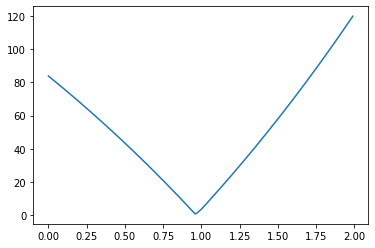

0.96


In [44]:
plt.plot(xgrid,ygrid)
plt.show()
print(r0_ideal)

In [38]:
time_window=5

def minimizer_gen(t1,t2,xgrid):

    ygrid=minimizer_vec(xgrid,t1=t1,t2=t2)
    r0_ideal=round(xgrid[np.argmin(ygrid)],2)

    return r0_ideal

In [45]:
print(whichcountry(countries_list[0])[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   2  10  11  22  32  37  41
  50  54  57  62  68  72  85  98 108 124 151 147 156 169 168 176 177 185
 198 214 237 240 230 224 221 211 213 206 212 203 218 215 230 220 222 231
 238 251 251 257 282]


In [76]:
r0_time=[]
scangrid=np.linspace(0,5,100)
array_country=whichcountry(countries_list[0])[0] #inizializzo

for name in range(0, len(countries_list)):
    print(countries_list[name],array_country)
    
    for i in range(0,today-(time_window-1)):
        min_val=minimizer_gen(i,i+time_window,scangrid)
        r0_time.append(min_val)
        scangrid=np.linspace(0,min_val+1,100)
        print(i,min_val)
        
    array_country=whichcountry(countries_list[name+1])[0]

Albania [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   2  10  11  22  32  37  41
  50  54  57  62  68  72  85  98 108 124 151 147 156 169 168 176 177 185
 198 214 237 240 230 224 221 211 213 206 212 203 218 215 230 220 222 231
 238 251 251 257 282]
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 1.0
48 2.0
49 3.0
50 3.07
51 2.3
52 2.1
53 2.1
54 1.72
55 1.73
56 1.88
57 2.07
58 2.17
59 2.37
60 2.28
61 2.02
62 2.01
63 1.76
64 1.25
65 1.45
66 1.36
67 1.19
68 1.33
69 1.39
70 1.64
71 1.68
72 1.62
73 1.24
74 0.81
75 0.68
76 0.8
77 0.8
78 0.82
79 0.9
80 0.98
81 1.12
82 1.13
83 1.29
84 1.04
85 1.13
86 1.01
87 1.26
88 1.35
89 1.28
90 1.27
Armenia [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   1   1   1   1   1   1   1   1   1   1   1   4   8  18  26
  52  77  83 114 135 159 192 233 235 249 271 300 376 391 449 499 536 623
 686 720 758 763 758 758 773 776 781 803 814 786 797 783 780 705 726 737
 768 816 840 841 846]
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 1.0
40 2.0
41 3.0
42 4.0
43 5.0
44 3.64
45 2.53
46 2.46
47 2.31
48 3.31
49 3.61
50 4.47
51 3.09
52 2.93
53 2.7
54 2.69
55 2.76
56 2.89
57 2.75
58 2.27
59 2.31
60 2.07
61 2.48
62 2.85
63 2.92
64 2.53
65 2.57
66 1.98
67 1.69
68 1.6
69 1.68
70 1.73
71 1.68
72 1.57
73 1.43
74 1.45
75 1.44
76 1.4
77 1.43
78 1.37
79 1.32
80 1.34
81 1.32
82 1.36
83 1.45
84 1.21
85 1.25
86 1.3
87 1.3
88 1.28
89 1.2
90 1.18
Bosnia and Herzegovina [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   2   2   3   3   3   5   7  11  13  18  24
  25  24  36  61  87  90 123 133 161 171 186 228 248 309 341 390 427 497
 535 573 601 598 663 691 722 736 770 777 792 807 816 847 848 883 890 879
 854 855 874 828 837]
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
1

67 1.44
68 1.5
69 1.74
70 1.8
71 1.78
72 1.43
73 1.3
74 1.18
75 1.26
76 1.26
77 1.23
78 1.24
79 1.18
80 1.12
81 1.16
82 1.16
83 1.16
84 1.16
85 1.13
86 1.14
87 1.06
88 1.06
89 1.04
90 1.03
Finland [   0    0    0    0    0    0    0    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    1    1    1    2    5    5    5
    5   11   14   14   22   29   39   58   58  154  224  234  267  311
  326  390  440  512  615  689  781  867  943 1024 1148 1219 1329 1391
 1419 1199 1295 1557 1599 1849 1974 2147 2263 2421 2556 2618 2705 2797
 2865 1594 1707 1891 1989 1770 1873 1980 2112 1718 1789]
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 1.0
8 0.99
9 1.01
10 0.99
11 1.01
12 0.99
13 1.01
14 0.99
15 1.01
16 0.99
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 1.0
36 2.0
37 3.0
38 3.56
39 1.01
40 2.01
41 3.01
42 4.01
43 3.34
44 3.42

55 2.8
56 3.03
57 2.65
58 2.03
59 2.02
60 1.74
61 1.91
62 1.94
63 1.66
64 1.69
65 1.52
66 1.4
67 1.38
68 1.32
69 1.38
70 1.15
71 1.09
72 0.93
73 1.01
74 0.75
75 0.55
76 0.56
77 0.52
78 0.43
79 0.4
80 0.49
81 0.24
82 0.09
83 0.0
84 0.0
85 0.05
86 0.02
87 0.09
88 0.0
89 0.0
90 0.0
Ireland [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     1     1     1     2     6     6    18    18    19    21
    34    42    42    89   127   127   167   216   285   549   675   777
   897  1114  1317  1550  1795  2094  2374  2564  2851  3159  3357  3746
  4148  4442  4811  5165  5474  5814  6286  7777  8583  9296 10257 11048
 12026 12708 13373 14110 14564 14888  6077  6669  7580  7937  8265]
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 

50 5.02
51 4.26
52 4.2
53 3.89
54 3.66
55 3.29
56 4.29
57 5.08
58 5.34
59 4.1
60 2.88
61 2.7
62 2.77
63 2.28
64 2.35
65 2.0
66 2.0
67 1.76
68 1.9
69 1.9
70 1.9
71 1.73
72 1.63
73 1.43
74 1.4
75 1.41
76 1.27
77 1.19
78 1.02
79 1.04
80 0.93
81 0.97
82 0.92
83 0.89
84 1.2
85 1.33
86 1.48
87 1.13
88 0.84
89 0.71
90 0.74
Luxembourg [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    1    1    1    1
    1    1    2    2    3    3    5    7   19   34   50   58   76  139
  201  331  480  662  784  861 1085 1319 1438 1550 1773 1889 1926 2075
 2210 2377 2081 2198 2268 2302 2426 2488 2563 2669 2708 2715 2723 2740
 2778 2823 2829 2864 2850 2846 2870 2863 2854  603  538]
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28

9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 1.0
36 2.0
37 3.0
38 3.56
39 4.56
40 4.66
41 5.03
42 4.2
43 3.2
44 3.44
45 4.31
46 4.45
47 5.12
48 3.83
49 2.78
50 2.83
51 1.97
52 1.98
53 1.9
54 1.9
55 1.9
56 2.08
57 2.02
58 2.04
59 2.0
60 1.85
61 1.84
62 1.84
63 1.86
64 1.79
65 1.55
66 1.47
67 1.42
68 1.47
69 1.45
70 1.41
71 1.34
72 1.3
73 1.23
74 1.22
75 1.17
76 1.12
77 1.18
78 1.15
79 1.13
80 1.12
81 1.11
82 1.11
83 1.15
84 1.13
85 1.08
86 1.09
87 1.08
88 1.11
89 1.11
90 1.11
Poland [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    1    1    5    5   11   16   22   31   48   66  100  116  160  220
  233  349  419  530  626  740  890 1030 1198 1366 1613 1833 2017 2271
 2464 2833 3256 343

3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 1.0
11 0.99
12 1.01
13 0.99
14 1.01
15 2.01
16 2.74
17 3.29
18 1.0
19 0.99
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 1.0
35 2.0
36 3.0
37 4.0
38 5.0
39 4.24
40 4.02
41 3.6
42 3.62
43 4.01
44 4.15
45 4.73
46 4.57
47 4.5
48 4.11
49 4.08
50 5.08
51 2.83
52 2.94
53 2.91
54 2.69
55 2.91
56 2.88
57 2.55
58 2.58
59 2.53
60 2.6
61 2.33
62 2.42
63 2.0
64 1.79
65 1.72
66 1.7
67 1.69
68 1.55
69 1.42
70 1.34
71 1.25
72 1.23
73 1.17
74 1.18
75 1.12
76 1.07
77 1.07
78 1.07
79 1.05
80 1.01
81 1.04
82 1.13
83 1.27
84 1.33
85 1.32
86 1.1
87 1.1
88 1.0
89 1.11
90 1.11
Sweden [    0     0     0     0     0     0     0     0     0     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     2
     7     7    12    14    15    21    35    94   101   161   203   247
   354   498   597   812   958  1018  10

IndexError: list index out of range

In [78]:
r0_countries0=np.transpose(np.reshape(r0_time, (len(countries_list),today-(time_window-1))))
print(r0_countries0)

[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [1.35 1.36 0.31 ... 1.33 1.64 1.34]
 [1.28 1.43 0.11 ... 1.22 1.71 1.32]
 [1.27 1.3  0.18 ... 1.1  1.62 1.34]]


In [79]:
r0_countries=pd.DataFrame(r0_countries0,index=pd.to_datetime(np.arange(len(r0_countries0)),unit='D',origin='2020-01-26'))

r0_countries.columns   = ['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']
print(r0_countries['Italy'])

2020-01-26    0.00
2020-01-27    0.00
2020-01-28    0.00
2020-01-29    0.00
2020-01-30    0.00
              ... 
2020-04-21    1.04
2020-04-22    1.01
2020-04-23    0.97
2020-04-24    0.96
2020-04-25    0.97
Name: Italy, Length: 91, dtype: float64


In [80]:
r0_countries.to_csv('r0_countries_allinone.csv',index=True)

In [81]:
r0_countries_imp = pd.read_csv('r0_countries_allinone.csv')

In [82]:
print(r0_countries_imp['Italy'])

0     0.00
1     0.00
2     0.00
3     0.00
4     0.00
      ... 
86    1.04
87    1.01
88    0.97
89    0.96
90    0.97
Name: Italy, Length: 91, dtype: float64


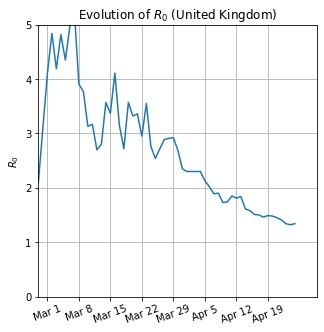

In [84]:
plt.figure(figsize=(5,5))
plt.plot(r0_countries_imp['United Kingdom'])
#plt.plot(r0_countries_imp['Germany'])
#plt.plot(r0_countries_imp['France'])
#plt.plot(r0_countries_imp['Ireland'])
plt.xticks(np.arange(0-(time_window-5),90,7),['Jan 26','Jan 2','Feb 9','Feb 16','Feb 23','Mar 1','Mar 8', 'Mar 15', 'Mar 22', 'Mar 29', 'Apr 5', 'Apr 12', 'Apr 19'],rotation=20)
plt.xlim(33,today)
plt.ylabel('$R_0$')
plt.ylim(0,5)
plt.grid()
plt.title('Evolution of $R_0$ (United Kingdom)')
#plt.savefig('output_countries/r0-evo_Italy.png',dpi=300)
plt.show()